Dataset Head:
         Date  MinTemp  MaxTemp  9amTemp  3pmTemp  Rainfall
0  01/12/2008     13.4     22.9     16.9     21.8       0.6
1  02/12/2008      7.4     25.1     17.2     24.3       0.0
2  03/12/2008     12.9     25.7     21.0     23.2       0.0
3  04/12/2008      9.2     28.0     18.1     26.5       0.0
4  05/12/2008     17.5     32.3     17.8     29.7       1.0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3011 entries, 0 to 3010
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3011 non-null   object 
 1   MinTemp   3005 non-null   float64
 2   MaxTemp   3010 non-null   float64
 3   9amTemp   3007 non-null   float64
 4   3pmTemp   3007 non-null   float64
 5   Rainfall  2991 non-null   float64
dtypes: float64(5), object(1)
memory usage: 141.3+ KB


<ipython-input-1-be32a767463c>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


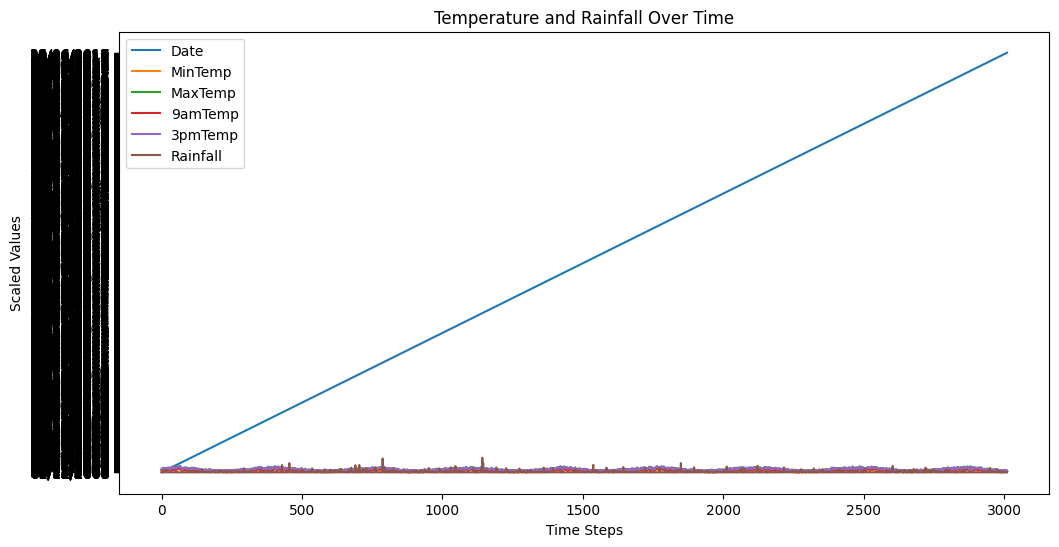

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
def load_and_visualize_data(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Display basic information
    print("Dataset Head:")
    print(df.head())
    print("\nDataset Info:")
    df.info()

    # Handle missing values (temporarily forward fill for visualization)
    df.fillna(method='ffill', inplace=True)

    # Visualize the data
    plt.figure(figsize=(12, 6))
    for column in df.columns:
        plt.plot(df[column], label=column)
    plt.title('Temperature and Rainfall Over Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Scaled Values')
    plt.legend()
    plt.show()

file_path = '/content/TemperatureRainFall.csv'  # Update this path to your dataset
load_and_visualize_data(file_path)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Preprocess the data
def preprocess_data(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Drop the Date column if it exists
    if 'Date' in df.columns:
        df.drop(columns=['Date'], inplace=True)

    # Handle missing values (forward fill)
    df.fillna(method='ffill', inplace=True)

    # Normalize the data
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(df)

    return data_scaled, scaler

# Use the updated preprocessing function
data_scaled, scaler = preprocess_data(file_path)


<ipython-input-3-85fd963cb66e>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Prepare the data for time-series modeling
def prepare_time_series_data(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])  # Input sequence
        y.append(data[i + time_steps])   # Prediction target
    return np.array(X), np.array(y)

time_steps = 10
X, y = prepare_time_series_data(data_scaled, time_steps)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the LSTM model
def build_and_train_model(X_train, y_train, input_shape):
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(64),
        Dropout(0.3),
        Dense(5, activation='linear')  # Output 5 predictions
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
    return model, history

input_shape = (X_train.shape[1], X_train.shape[2])
model, history = build_and_train_model(X_train, y_train, input_shape)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0489 - mae: 0.1573 - val_loss: 0.0095 - val_mae: 0.0722
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0136 - mae: 0.0880 - val_loss: 0.0090 - val_mae: 0.0712
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0136 - mae: 0.0875 - val_loss: 0.0082 - val_mae: 0.0692
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0138 - mae: 0.0871 - val_loss: 0.0080 - val_mae: 0.0668
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0115 - mae: 0.0803 - val_loss: 0.0077 - val_mae: 0.0664
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0111 - mae: 0.0781 - val_loss: 0.0073 - val_mae: 0.0631
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0105 - mae: 0.0756 - val_loss: 0.0071 - val_mae: 0.0616
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0103 - mae: 0.0751 - val_loss: 0.0068 - val_mae: 0.0620
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0099 - mae: 0.

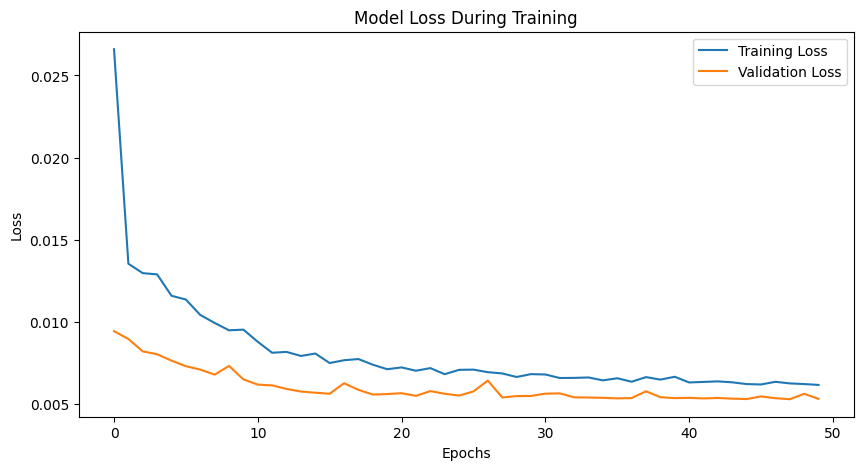

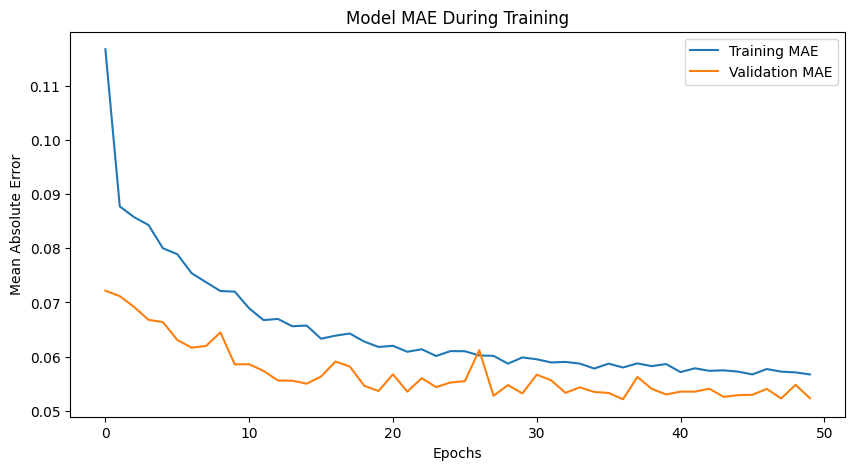

In [ ]:
# Plot training and validation loss
def plot_training_history(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss During Training')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Model MAE During Training')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.show()

plot_training_history(history)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate the model
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions_rescaled = scaler.inverse_transform(predictions)
    y_test_rescaled = scaler.inverse_transform(y_test)

    mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
    mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    return mse, mae

evaluate_model(model, X_test, y_test, scaler)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Mean Squared Error (MSE): 13.665887940650316
Mean Absolute Error (MAE): 2.282891636833009


(13.665887940650316, 2.282891636833009)

In [ ]:
predictions = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
predictions_denorm = scaler.inverse_transform(predictions)
y_test_denorm = scaler.inverse_transform(y_test)
